## Importing the libraries

In [178]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

## Loading the dataset 

In [179]:
marketing = pd.read_csv('DataSets/marketing_campaign.csv', sep='\t')

In [180]:
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [181]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [182]:
marketing.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## Cleaning the null values

<AxesSubplot:>

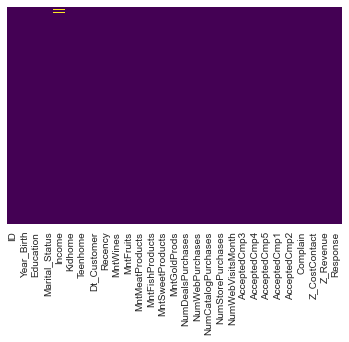

In [183]:
sns.heatmap(marketing.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [184]:
marketing = marketing.dropna()

In [185]:
marketing.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

<AxesSubplot:>

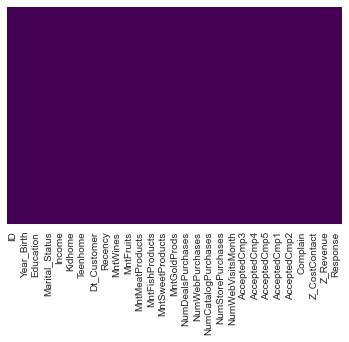

In [186]:
sns.heatmap(marketing.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Feature Engineering

In [187]:
# Deriving age from the birth year
marketing['Age'] = 2022 - marketing["Year_Birth"]

In [188]:
# Total expenditure of the customer
marketing["Spent"] = marketing["MntWines"] + marketing["MntFruits"] + marketing["MntMeatProducts"] + marketing["MntFishProducts"] + marketing["MntSweetProducts"] + marketing["MntGoldProds"]

In [189]:
# Column for knowing whether a customer is a parent or not
marketing["Is_Parent"] = np.where(marketing["Kidhome"] + marketing["Teenhome"] > 0, 1, 0)

## Dropping some features

In [190]:
marketing = marketing.drop(["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"], axis=1)

In [191]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

## Visualizing the data

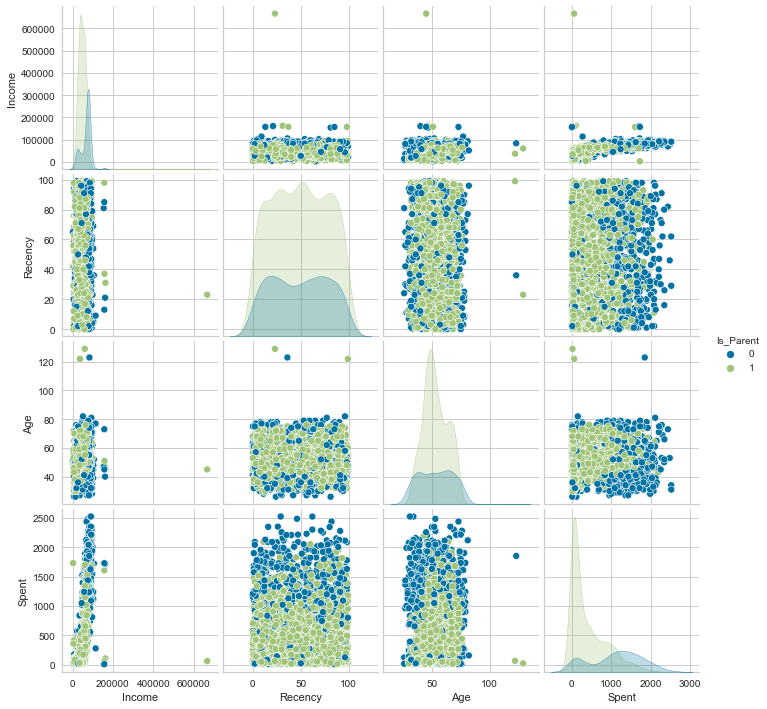

In [192]:
sns.pairplot(marketing[[ "Income", "Recency", "Age", "Spent", "Is_Parent"]], hue="Is_Parent")

## PCA

In [193]:
marketing = marketing.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response', 'Education'], axis=1)

In [194]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2216 non-null   float64
 1   Kidhome              2216 non-null   int64  
 2   Teenhome             2216 non-null   int64  
 3   Recency              2216 non-null   int64  
 4   MntWines             2216 non-null   int64  
 5   MntFruits            2216 non-null   int64  
 6   MntMeatProducts      2216 non-null   int64  
 7   MntFishProducts      2216 non-null   int64  
 8   MntSweetProducts     2216 non-null   int64  
 9   MntGoldProds         2216 non-null   int64  
 10  NumDealsPurchases    2216 non-null   int64  
 11  NumWebPurchases      2216 non-null   int64  
 12  NumCatalogPurchases  2216 non-null   int64  
 13  NumStorePurchases    2216 non-null   int64  
 14  NumWebVisitsMonth    2216 non-null   int64  
 15  Age                  2216 non-null   i

In [195]:
pca = PCA(n_components=3)
pca.fit(marketing)
PCA_marketing = pd.DataFrame(pca.transform(marketing), columns=(["feat1","feat2", "feat3"]))
PCA_marketing.describe().T

,count,mean,std,min,25%,50%,75%,max
feat1,2216.0,8.000660e-13,25177.423755,-50521.420920,-16952.434574,-870.841468,16285.749869,614300.749939
feat2,2216.0,1.687860e-14,526.050642,-2122.256194,-225.301425,99.723561,300.107537,12042.119391
feat3,2216.0,3.962634e-15,180.160480,-701.666827,-57.883896,10.902901,43.377262,1492.900753


## Elbow method to find the number of clusters

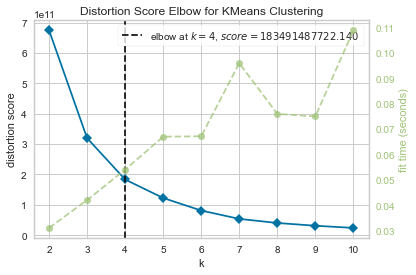

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [196]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_marketing)
Elbow_M.show()

## Training the model

In [197]:
KMModel = KMeans(n_clusters=4)

In [198]:
y_pred = KMModel.fit_predict(PCA_marketing)
PCA_marketing["Clusters"] = y_pred

In [199]:
marketing["Clusters"]= y_pred

In [200]:
cmap = matplotlib.colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

## Visualization of Clusters formed

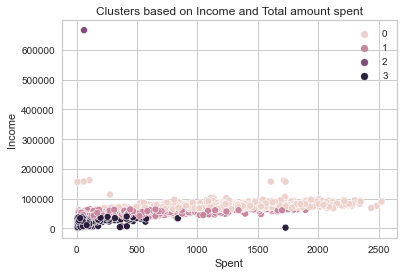

In [201]:
pl = sns.scatterplot(data=marketing, x=marketing["Spent"], y=marketing["Income"],hue=marketing["Clusters"])
pl.set_title("Clusters based on Income and Total amount spent")
plt.legend()
plt.show()

## Evaluating the model

In [205]:
print(f"Silhoutte Score of the model: {metrics.silhouette_score(PCA_marketing, y_pred)}")

Silhoutte Score of the model: 0.5403448315062159
